In [1]:
import pandas as pd
import os

### Merge all files

In [2]:
# df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data/')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.head()
all_months_data.to_csv('all_data.csv',index = False)
#df.head()

### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Clean Up Data

In [4]:
# see the number of rows with nan values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
all_data.shape

(186850, 6)

In [6]:
# get a dataframe with only nan values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186348,NaN,NaN,NaN,NaN,NaN,NaN
186390,NaN,NaN,NaN,NaN,NaN,NaN
186406,NaN,NaN,NaN,NaN,NaN,NaN
186594,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Since all columns are nan, drop them
all_data.dropna(how='all', inplace=True)

### Augument data with additional columns

#### Task 2: Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

In [9]:
# Find rows that has month as 'Or'
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
# Create a dataframe without those columns
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Task 3: Add Sales Column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [14]:
# Convert data type
all_data ['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data ['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

### Question 1: What was the best month for sales? How much was earned that month?

In [16]:
results = all_data.groupby('Month').sum()['Sales']

In [17]:
all_data.groupby('Month').sum()['Sales'].max()

4613443.340001534

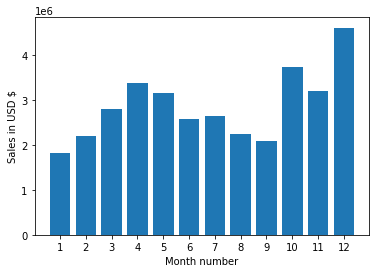

In [18]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results)
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month number')
plt.show()

### What city has the highest number of sales?

### task 4: Augument data with a city column

In [19]:
# use .apply method
all_data['Column'] = all_data["Purchase Address"].apply(lambda x:x.split(',')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [20]:
def get_City(address):
    return address.split(',')[1]

all_data['City'] = all_data["Purchase Address"].apply(get_City)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,Austin


In [21]:
all_data.drop(columns = 'City',inplace=True)

In [22]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [23]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_City(x) + '('+get_state(x)+')')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,Boston(MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,Portland(OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,San Francisco(CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,Los Angeles(CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,Austin(TX)
...,...,...,...,...,...,...,...,...,...,...
186845,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",5,99.99,Seattle,Seattle(WA)
186846,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",5,11.99,San Francisco,San Francisco(CA)
186847,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5,5.98,Boston,Boston(MA)
186848,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",5,11.95,Seattle,Seattle(WA)


In [24]:
# using fstring
all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_City(x)} ({get_state(x)})")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,Austin (TX)
...,...,...,...,...,...,...,...,...,...,...
186845,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",5,99.99,Seattle,Seattle (WA)
186846,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",5,11.99,San Francisco,San Francisco (CA)
186847,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5,5.98,Boston,Boston (MA)
186848,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",5,11.95,Seattle,Seattle (WA)


In [25]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


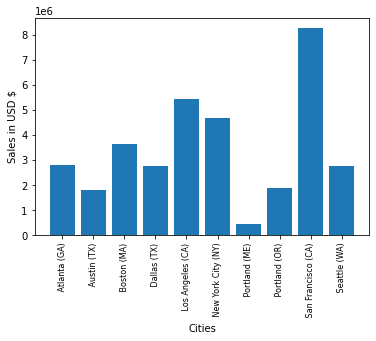

In [29]:
# wrong graph as unique returns cities in a different order so sort it
import matplotlib.pyplot as plt
cities = sorted(all_data['City'].unique())
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('Cities')
plt.show()

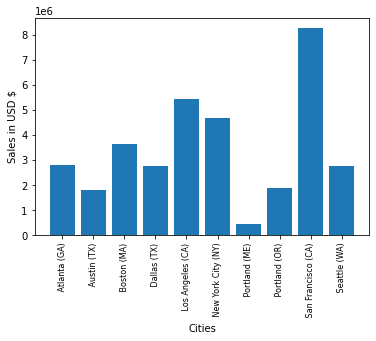

In [30]:
# wrong graph as unique returns cities in a different order
import matplotlib.pyplot as plt
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('Cities')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [31]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,Austin (TX)


In [37]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,Austin (TX),11


In [38]:
hours = [hour for hour,df in all_data.groupby('Hour')]

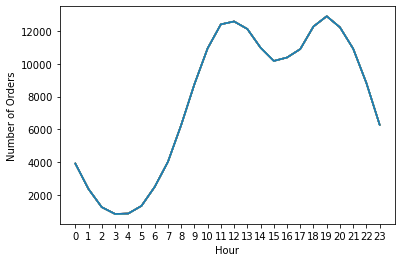

In [44]:
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

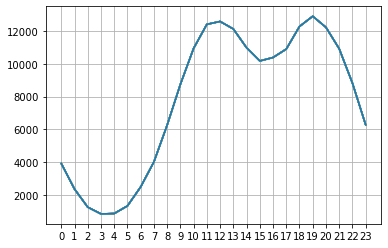

In [43]:
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

#### Peak at 11 am and 7 pm

#### Can be done for each city separately

### Question 4 What products are most often sold together

In [48]:
# Same order ID
# Create a dataframe with all duplicated rows - Keep all duplicates
# Keep can be first or last to retain only first or last record
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [46]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [49]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-49-0b35994e80a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"


In [51]:
# to remove duplicates
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-51-6d8880e33165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [53]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [56]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
# print(count)
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [57]:
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [58]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
# print(count)
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5)]

In [59]:
for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Question 5: What product sold the most? Why do you think it sold the most?

In [61]:
product_data = all_data.groupby('Product')
print(product_data.sum())

                            Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                

In [65]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

In [66]:
products = [product for product,df in product_group]

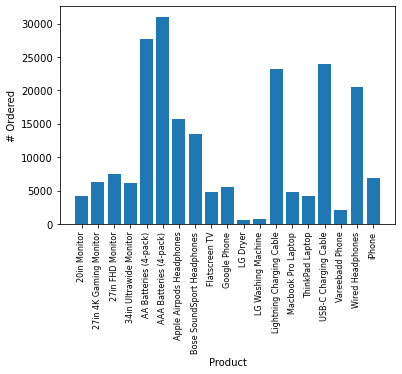

In [75]:
plt.bar(products, quantity_ordered)
plt.ylabel('# Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [76]:
#### Overlay with prices

In [78]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-87-8d50beb3b324>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


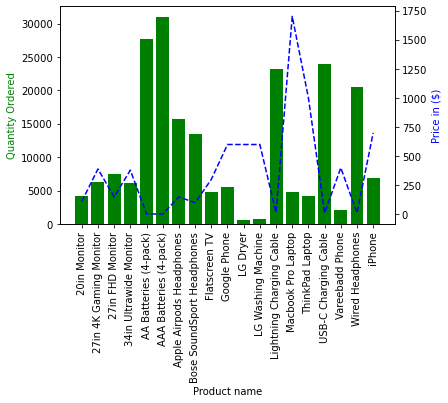

In [87]:
prices = all_data.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered,color='g')

ax2.plot(products,prices,'b--')

ax1.set_xlabel('Product name')

ax1.set_ylabel('Quantity Ordered',color='g')

ax2.set_ylabel('Price in ($)',color='b')

#y = list(range(0,250,25))

#ax2.set_yticklabels(y)

ax1.set_xticklabels(products,rotation='vertical')
plt.show()